In [73]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
from typing import Dict

### Read files

In [74]:
file_path = 'TRDataChallenge2023.zip'
extract_file_path = 'TRDataChallenge2023'

In [75]:
with zipfile.ZipFile(file_path,"r") as zip_ref:
    zip_ref.extractall(extract_file_path)

In [76]:
os.path.join(extract_file_path, f"{extract_file_path}.txt")

'TRDataChallenge2023\\TRDataChallenge2023.txt'

In [77]:
df = pd.read_json(os.path.join(extract_file_path, f"{extract_file_path}.txt"), lines=True)

### EDA

In [78]:
df.isna().sum()

documentId    0
postures      0
sections      0
dtype: int64

In [79]:
df.head()

,documentId,postures,sections
0,Ib4e590e0a55f11e8a5d58a2c8dcb28b5,[On Appeal],"[{'headtext': '', 'paragraphs': ['Plaintiff Dw..."
1,Ib06ab4d056a011e98c7a8e995225dbf9,"[Appellate Review, Sentencing or Penalty Phase...","[{'headtext': '', 'paragraphs': ['After pleadi..."
2,Iaa3e3390b93111e9ba33b03ae9101fb2,"[Motion to Compel Arbitration, On Appeal]","[{'headtext': '', 'paragraphs': ['Frederick Gr..."
3,I0d4dffc381b711e280719c3f0e80bdd0,"[On Appeal, Review of Administrative Decision]","[{'headtext': '', 'paragraphs': ['Appeal from ..."
4,I82c7ef10d6d111e8aec5b23c3317c9c0,[On Appeal],"[{'headtext': '', 'paragraphs': ['Order, Supre..."


In [80]:
# Number of postures per case
df['len_postures'] = df['postures'].map(len)

In [82]:
# Number of paragraphs per case
def count_paragrapth(sections: Dict) -> int:
    """
    Counts the total number of paragraphs across multiple sections.

    Parameters:
        sections (dict): A dictionary containing sections, where each section
            is represented by a dictionary with 'paragraphs' as a key. Each
            'paragraphs' value is expected to be an iterable containing
            paragraphs.

    Returns:
        int: The total number of paragraphs found in all sections.
    """
    num_paragraphs = 0
    for section in sections:
        # print(len(section['paragraphs']))
        num_paragraphs += len(section['paragraphs'])
        # print(section['paragraphs'])
    return num_paragraphs

df["len_paragraphs"] = df['sections'].map(count_paragrapth)

### Answer

In [83]:
print(f"Num documents: {len(df)}")
print(f'Number of postures are calculated per case in the column "len_postures", printing the value counts of each length')
df['len_postures'].value_counts()

Num documents: 18000
Number of postures are calculated per case in the column "len_postures", printing the value counts of each length


len_postures
1    8118
2    7604
3    1129
0     923
4     190
5      32
7       2
6       2
Name: count, dtype: int64

In [84]:
print(f'Number of paragraphs are calculated per case in the column "len_paragraphs", printing the value counts of each length')
df['len_paragraphs'].value_counts()

Number of paragraphs are calculated per case in the column "len_paragraphs", printing the value counts of each length


len_paragraphs
6      921
5      911
4      801
7      713
8      594
      ... 
227      1
414      1
269      1
173      1
320      1
Name: count, Length: 255, dtype: int64

In [112]:
df['len_paragraphs'].describe()

count    18000.00000
mean        30.12050
std         34.08201
min          0.00000
25%          8.00000
50%         21.00000
75%         40.00000
max       1174.00000
Name: len_paragraphs, dtype: float64

<Axes: ylabel='Frequency'>

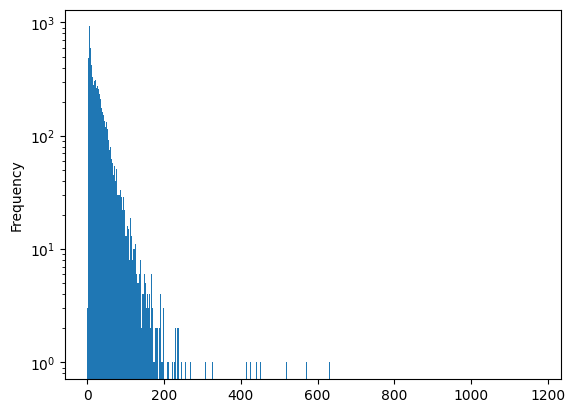

In [107]:
df['len_paragraphs'].plot.hist(bins=np.arange(1175), logy=True)


In [135]:
all_labels = np.concatenate(df['postures'].values)
count_dict= dict(zip(*np.unique(all_labels, return_counts=True)))

In [136]:
count_dict

{'Appellate Review': 4652,
 "Application for Attorneys' or Professional Fees and Expenses": 15,
 'Application for Bankruptcy Trustee Fees': 1,
 'Application to Employ Attorney or Other Professional': 7,
 'Application to Vacate Arbitration Award': 54,
 'Bail or Custody Motion': 49,
 'Certified Question': 72,
 'Declinatory Exception of Improper Venue': 1,
 'Declinatory Exception of Insufficiency of Service of Process': 1,
 'Declinatory Exception of Lack of Personal Jurisdiction': 1,
 'Declinatory Exception of Lack of Subject Matter Jurisdiction': 3,
 'Declinatory Exception of Lis Pendens': 2,
 'Dilatory Exception of Unauthorized Use of Summary Proceeding': 1,
 'Joinder': 1,
 'Jury Selection Challenge or Motion': 84,
 'Juvenile Delinquency Proceeding': 146,
 'Juvenile Wardship Petition': 3,
 'Motion Authorizing and Approving Payment of Certain Prepetition Obligations': 1,
 'Motion For Turnover': 7,
 'Motion for Abandonment of Property': 1,
 'Motion for Abatement': 3,
 'Motion for Addition

In [133]:
for x in count_dict:
    if count_dict[x] == 1:
        print(x)

Application for Bankruptcy Trustee Fees
Declinatory Exception of Improper Venue
Declinatory Exception of Insufficiency of Service of Process
Declinatory Exception of Lack of Personal Jurisdiction
Dilatory Exception of Unauthorized Use of Summary Proceeding
Joinder
Motion Authorizing and Approving Payment of Certain Prepetition Obligations
Motion for Abandonment of Property
Motion for Adequate Protection
Motion for Appointment of an Expert
Motion for Contempt for Violating Discharge Injunction or Order
Motion for Genetic Testing
Motion for Leave to File Late or Untimely Notice of Appeal
Motion for Maritime Attachment and Garnishment
Motion for Qualified Domestic Relations Order (QDRO)
Motion for Witness List or Production of Witnesses
Motion to Admonish Jury
Motion to Allow Late Filing of Proof of Claim
Motion to Appoint Chapter 11 Trustee or Examiner
Motion to Appoint Substitute Custodian of Vessel
Motion to Approve Disclosure Statement
Motion to Compel Abandonment
Motion to Deny Class